In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data (assuming you have a DataFrame named 'data')
data = pd.read_csv('cleaneded_main_model_data.csv')

# Select relevant features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane', 'propane',
                     'ibutane', 'ipentane', 'hexane', 'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
target_variable = 'z'
X = data[selected_features]
y = data[target_variable]


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Define the AdaBoost model with an underlying base regressor (e.g., DecisionTreeRegressor)
base_regressor = DecisionTreeRegressor(max_depth=4)  # You can adjust the depth as needed
model = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=0)

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MAPE, RMSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.9f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.9f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.9f}')
print(f'R-squared (R2) Value: {r2:.9f}')


Mean Absolute Error (MAE): 0.000131129
Mean Absolute Percentage Error (MAPE): 0.013158086%
Root Mean Squared Error (RMSE): 0.000172041
R-squared (R2) Value: 0.973737497


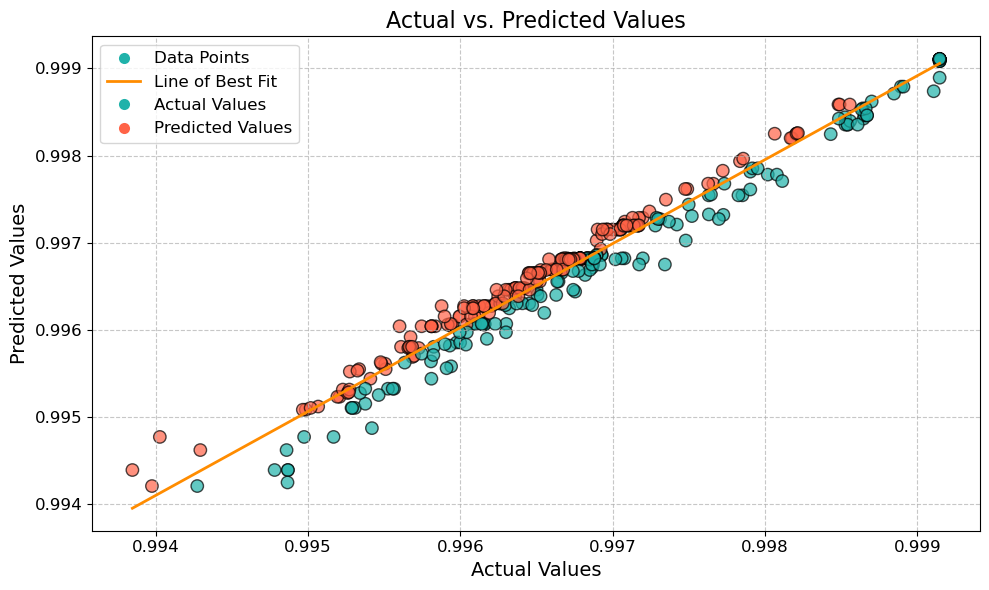

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define custom colors for data points
custom_colors = ['lightseagreen' if y >= y_pred else 'tomato' for y, y_pred in zip(y_test, y_pred)]

# Use clear markers for data points and adjust marker size
plt.scatter(y_test, y_pred, s=80, c=custom_colors, edgecolors='k', marker='o', alpha=0.7)

# Calculate the regression line (line of best fit)
regression_line_x = np.array([min(y_test), max(y_test)])
regression_line_y = np.poly1d(np.polyfit(y_test, y_pred, 1))(regression_line_x)

# Plot the regression line
plt.plot(regression_line_x, regression_line_y, linestyle='-', color='darkorange', linewidth=2, label='Line of Best Fit')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the background color to white
plt.gca().set_facecolor('white')

# Create a custom legend with all four labels
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightseagreen', markersize=8, label='Data Points', markeredgewidth=0, markeredgecolor='k'),
    Line2D([0], [0], linestyle='-', color='darkorange', linewidth=2, label='Line of Best Fit'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightseagreen', markersize=8, label='Actual Values', markeredgewidth=0, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='tomato', markersize=8, label='Predicted Values', markeredgewidth=0, markeredgecolor='k')
]

plt.legend(handles=custom_legend, fontsize=12)

plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a visually appealing bar plot of feature importances
plt.figure(figsize=(12, 6))

# Define custom colors for the bars
custom_colors = plt.cm.viridis(np.linspace(0, 1, len(selected_features)))

# Create the bar plot with custom colors
plt.barh(range(1, len(selected_features) + 1), feature_ranking, color=custom_colors)

plt.yticks(range(1, len(selected_features) + 1), selected_features, fontsize=12)
plt.xlabel('Feature Ranking (1 is most important)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances using Recursive Feature Elimination (RFE)', fontsize=16)

# Add a color scale to show the strength of feature importance
color_scale = plt.cm.ScalarMappable(cmap='viridis')
color_scale.set_array(feature_ranking)
color_bar = plt.colorbar(color_scale, orientation='vertical', pad=0.02)
color_bar.set_label('Importance Strength', fontsize=12)

# Invert the y-axis for the most important feature at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


NameError: name 'feature_ranking' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('AdaBoost_pred_values.csv', index=False)
